In [ ]:
from tweet_stream import TwitterAuth, PrintStream, FileStream, get_stream

# consumer_key = 'insert_here'
# consumer_secret = 'insert_here'
# access_token = 'insert_here'
# access_token_secret = 'insert_here'

consumer_key = 'insert_here'
consumer_secret = 'insert_here'
access_token = 'insert_here'
access_token_secret = 'insert_here'

auth = TwitterAuth(consumer_key, consumer_secret, access_token, access_token_secret)
con = auth.make_connector()
listener = PrintStream()
stream = get_stream(con, listener)
stream.filter(track=['Broncos','Cardinals'])

In [ ]:
import json

tweets = []
f = open('tweets.txt', 'r')
for line in f:
    try:
        tweet = json.loads(line)
        tweets.append(tweet)
    except:
        continue
        
from pprint import pprint
import pandas as pd
df = pd.DataFrame(tweets)

test_me=df.ix[26]['retweeted_status']

org_tweets=df[df['retweeted_status'].isnull()]

df['text'].value_counts()
org_tweets.ix[0:1000]['text']
org_tweets_blob=''.join(org_tweets)
org_list=org_tweets['text'][~org_tweets['text'].isnull()].tolist()
org_list=org_tweets['text'].tolist()
text_blob = ''.join(org_list)
df['text'][1]
text_blob[:3000]

In [6]:
# These commands set up the notebook plotting interface, so no need to modify
%pylab inline
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


[]

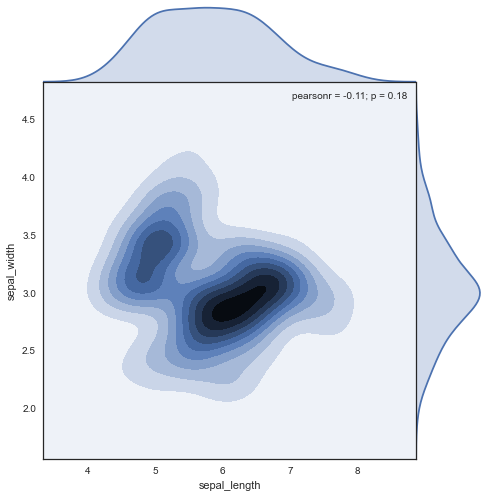

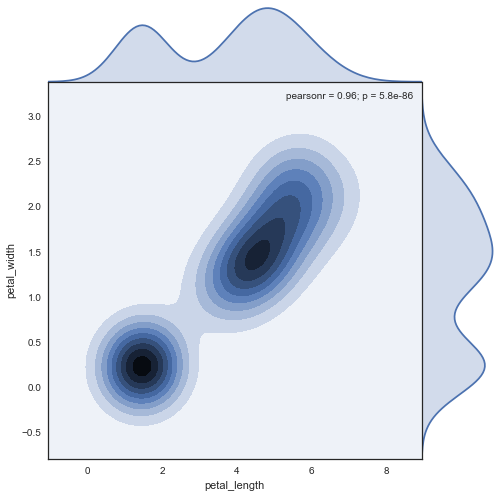

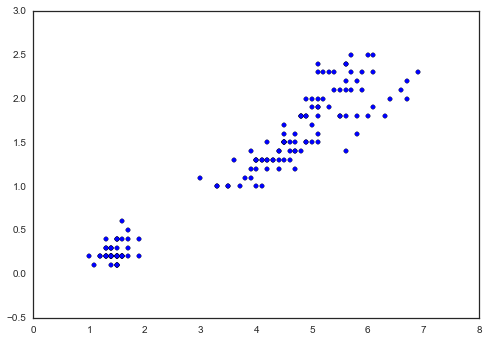

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="white")

df = pd.DataFrame.from_csv('datasets/iris_data.csv', index_col=4)


sepal_plot = sns.jointplot(df['sepal_length'],df['sepal_width'], kind='kde', size=7, space=0)
petal_plot = sns.jointplot(df['petal_length'],df['petal_width'], kind='kde', size=7, space=0)
